In [28]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy
import statsmodels.stats.api as sms
import matplotlib.patches as mpatches
import random

In [29]:
from scipy.signal import butter, lfilter, freqz, lfilter_zi
#Defining filter algorithms

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='lowpass', analog = False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a)
    y, zf = lfilter(b, a, data, zi=zi*data[0])
    return y, zf


In [30]:
# Importing data from csv
def import_data(data_path):
    path = data_path
    data_df = pd.read_csv(path, sep=';')




In [47]:
#filter out all neesed information
def filter_data(data_df, file):
    """
    Filters data with low pass filter. saves a .csv file of the data called filtered_data.csv
    
    Inputs:
        data_df(DataFrame)     :     Contains all the data that is to be used.
        file(string)           :     Name of the file to filter
    """
    order = 3
    fs = 30
    cutoff = 0.1

    b, a = butter_lowpass(cutoff, fs, order)

    ft14_lst = []
    lt15_lst = []
    lt17_lst = []
    lt18_lst = []
    GammaDensity_lst = []
    FT20A_lst = []
    FT20C_lst = []
    TT13_lst = []
    PT11_lst = []
    PDT12_lst = []
    ft14b_lst = []

    col_names = ["FT-14A", "LT-15", "LT-17", "LT-18", "GammaDensity", "FT-20A", "FT-20C",
                "TT-13", "PT-11", "PDT-12", "FT-14B"]

    y, zf = butter_lowpass_filter(data_df['FT-14A'], cutoff, fs, order)
    for i in y:
        ft14_lst.append(round(i,2))

    y, zf = butter_lowpass_filter(data_df['LT-15'], cutoff, fs, order)
    for i in y:
        lt15_lst.append(round(i,2))

    y, zf = butter_lowpass_filter(data_df['LT-17'], cutoff, fs, order)
    for i in y:
        lt17_lst.append(round(i,2))

    y, zf = butter_lowpass_filter(data_df['LT-18'], cutoff, fs, order)
    for i in y:
        lt18_lst.append(round(i,2))
    
    y, zf = butter_lowpass_filter(data_df['GammaDensity'], cutoff, fs, order)
    for i in y:
        GammaDensity_lst.append(round(i,2))
    
     
    y, zf = butter_lowpass_filter(data_df['dens'], cutoff, fs, order)
    for i in y:
        FT20A_lst.append(round(i,2))
        
    
    
    y, zf = butter_lowpass_filter(data_df['FT-20C'], cutoff, fs, order)
    for i in y:
        FT20C_lst.append(round(i,2))
    
    y, zf = butter_lowpass_filter(data_df['TT-13'], cutoff, fs, order)
    for i in y:
        TT13_lst.append(round(i,2))
        
    y, zf = butter_lowpass_filter(data_df['PT-11'], cutoff, fs, order)
    for i in y:
        PT11_lst.append(round(i,2))
    
        
    y, zf = butter_lowpass_filter(data_df['PDT-12'], cutoff, fs, order)
    for i in y:
        PDT12_lst.append(round(i,2))
        
    y, zf = butter_lowpass_filter(data_df['FT-14B.1'], cutoff, fs, order)
    for i in y:
        ft14b_lst.append(round(i,2))


    tempus = []
    tempus.append(ft14_lst)
    tempus.append(lt15_lst)
    tempus.append(lt17_lst)
    tempus.append(lt18_lst)
    tempus.append(GammaDensity_lst)
    tempus.append(FT20A_lst)
    tempus.append(FT20C_lst)
    tempus.append(TT13_lst)
    tempus.append(PT11_lst)
    tempus.append(PDT12_lst)
    tempus.append(ft14b_lst)

    temp_arr = np.array(tempus)
    temp_transposed_arr = temp_arr.T
    tempus_transposed = temp_transposed_arr.tolist()

    df_filtered = pd.DataFrame(data = tempus_transposed, columns=col_names)
    print(df_filtered)
    df_filtered.to_csv(f'filtered_{file}')

In [45]:
def data_prep(path, file):
    """
    Removes unwanted data from csv, then filteres it
    
    input:
        data_path(string)       :    Path to the data that is to be prepared
    """
    path = path+file
    data_df = pd.read_csv(path, sep=',')
    print(data_df['FT-14B.1'])
    
    filter_data(data_df, file)

In [38]:
data_df = pd.read_csv("sensordata/experiment4.csv", sep=',')
data_df

,FT-14A,FT-14B,LT-17,LT-18,LT-15,GammaDensity,dens,FT-20C,TT-13,PT-11,PDT-12,FT-14B.1
0,269.301564,1001.157814,67.311234,45.351492,69.627271,1.215418,1143.366979,2.452546,18.632220,0.475138,4.978376,1143.366979
1,254.588097,1001.170206,71.788762,44.599680,69.915682,1.215449,1143.585786,2.460185,18.664330,0.442810,4.049683,1143.585786
2,250.909567,1000.885080,68.216814,44.173969,70.902786,1.215515,1144.120929,2.450645,18.700000,0.468000,5.760000,1144.120929
3,251.410484,1001.011981,67.820855,43.390189,70.406333,1.215747,1143.695362,2.447596,18.663625,0.449570,4.372315,1143.695362
4,251.088724,1000.950940,67.172091,36.090970,69.617988,1.216188,1143.907973,2.441859,18.679623,0.462622,4.992958,1143.907973
...,...,...,...,...,...,...,...,...,...,...,...,...
4980,NaN,NaN,NaN,NaN,NaN,1.214438,1143.723014,2.097446,20.188227,0.467811,4.618276,1143.723014
4981,NaN,NaN,NaN,NaN,NaN,1.215342,1144.129764,2.101806,20.202045,0.458594,5.333756,1144.129764
4982,NaN,NaN,NaN,NaN,NaN,1.214662,1143.337491,2.104920,20.212585,0.442756,4.896633,1143.337491
4983,NaN,NaN,NaN,NaN,NaN,1.215750,1143.352292,2.089971,20.212355,0.444386,4.934570,1143.352292


In [49]:
path = "sensordata/"
file = "experiment5.csv"

data_prep(path, file)

0       1352.988829
1       1353.660396
2       1353.328571
3       1354.062326
4       1354.261972
           ...     
4434            NaN
4435            NaN
4436            NaN
4437            NaN
4438            NaN
Name: FT-14B.1, Length: 4439, dtype: float64
      FT-14A  LT-15  LT-17  LT-18  GammaDensity   FT-20A  FT-20C  TT-13  \
0     269.30  69.63  67.31  45.35          1.38  1364.42    6.04  19.11   
1     269.30  69.63  67.31  45.35          1.38  1364.42    6.04  19.11   
2     269.30  69.63  67.31  45.35          1.38  1364.42    6.04  19.11   
3     269.30  69.63  67.31  45.35          1.38  1364.42    6.04  19.11   
4     269.30  69.63  67.31  45.35          1.38  1364.42    6.04  19.11   
...      ...    ...    ...    ...           ...      ...     ...    ...   
4434  252.97  64.41  68.22  42.94           NaN      NaN     NaN    NaN   
4435  252.86  64.37  68.19  42.93           NaN      NaN     NaN    NaN   
4436  252.75  64.33  68.16  42.93           NaN      NaN    

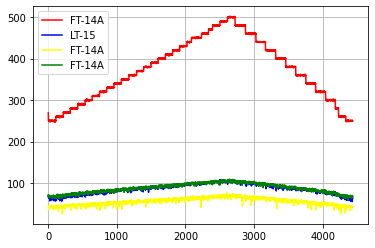

In [8]:
plt.plot(data_df['FT-14A'], color = 'red', label = 'FT-14A')
plt.plot(data_df['LT-15'], color = 'blue', label = 'LT-15')
plt.plot(data_df['LT-18'], color = 'yellow', label = 'FT-14A')
plt.plot(data_df['LT-17'], color = 'green', label = 'FT-14A')

plt.legend()
plt.grid()
plt.show()